In [1]:
from PIL import Image
import glob
import os

### 1. 손 모양 다양한 train set - 손 모양 일정한 test set
train set 300개 / test set 300개 / 이미지 크기 28x28

#### trian 이미지 불러오기: 가위, 바위, 보 각 100장을 28x28 사이즈로 불러와 저장

In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/resized_data/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/resized_data/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/resized_data/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#### trian 이미지 불러오기: 가위, 바위, 보 각 100장을 28x28 사이즈로 불러와 저장

In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/resized_data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_norm shape: (300, 28, 28, 3)
y_train shape: (300,)


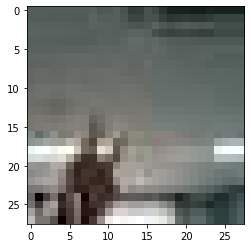

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train_norm[0])
plt.show()

#### 딥러닝 네트워크 설계

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(2)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

#### optimizer 선언

In [8]:
opt = keras.optimizers.SGD(learning_rate=1e-4)

In [9]:
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### train set 학습

Epoch 1/10
10/10 [==============================] - 3s 11ms/step - loss: 1.1840 - accuracy: 0.3333
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1800 - accuracy: 0.3333
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1760 - accuracy: 0.3333
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1722 - accuracy: 0.3333
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1687 - accuracy: 0.3333
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1654 - accuracy: 0.3333
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1623 - accuracy: 0.3333
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1594 - accuracy: 0.3333
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1568 - accuracy: 0.3333
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1539 - accuracy: 0.3333
dict_keys(['loss',

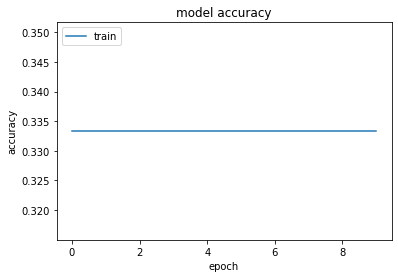

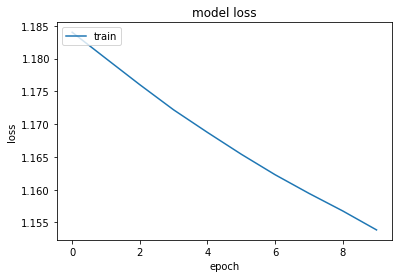

In [10]:
import matplotlib.pyplot as plt

# Fit the model
results = model.fit(x_train_norm, y_train, epochs=10)

# list all data in history
print(results.history.keys())

# summarize history for accuracy
plt.plot(results.history['accuracy'])
# plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
# plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### test set 불러오기: 가위, 바위, 보 각각을 한 가지 모양으로 촬영한 data set

In [11]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/fixed_data/scissor_fixed"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [12]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/fixed_data/rock_fixed"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [13]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/fixed_data/paper_fixed"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#### test set의 가위, 바위, 보 각각에 라벨 부여

In [14]:
import numpy as np

def load_data_fixed(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_fixed/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_fixed/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_fixed/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/fixed_data"
(x_test, y_test)=load_data_fixed(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


#### test set로 성능 확인

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.1469 - accuracy: 0.3333
test_loss: 1.1469473838806152
test_accuracy: 0.3333333432674408


#### 예측에 실패한 데이터 확인

In [16]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0.24116778 0.2755498  0.48328233]
라벨: 1, 예측결과: 2


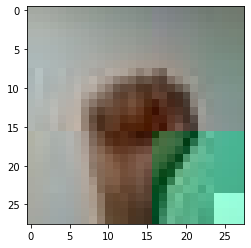

예측확률분포: [0.2208773  0.281358   0.49776474]
라벨: 0, 예측결과: 2


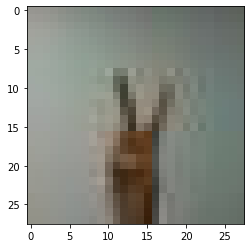

예측확률분포: [0.22042462 0.28361565 0.4959597 ]
라벨: 0, 예측결과: 2


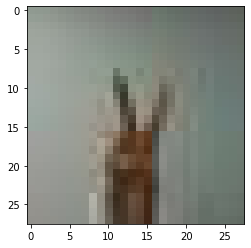

예측확률분포: [0.22318217 0.27574062 0.5010772 ]
라벨: 1, 예측결과: 2


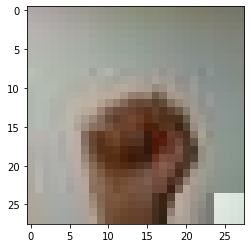

예측확률분포: [0.21943158 0.27896905 0.5015994 ]
라벨: 0, 예측결과: 2


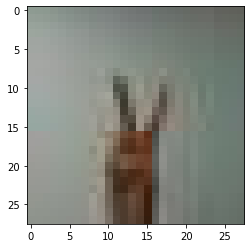

In [17]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 2. 손 모양 다양한 train set - 손 모양 다양한 test set
train set 3000개 / test set 3000개 / 이미지 크기 64x64

#### trian 이미지 불러오기: 가위, 바위, 보 각 1000장을 64x64 사이즈로 불러와 저장

In [18]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
    target_size=(64,64)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data/scissor/train"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!


In [19]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data/rock/train"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!


In [20]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data/paper/train"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


#### 가위:0, 바위:1, 보:2 각각에 라벨 부여

In [21]:
import numpy as np

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size, color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/train/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/train/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/train/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train_norm shape: (3000, 64, 64, 3)
y_train shape: (3000,)


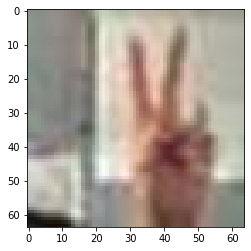

In [22]:
plt.imshow(x_train_norm[0])
plt.show()

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.layers import BatchNormalization

tf.random.set_seed(2)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  8
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                401472    
_________________________________________________________________
dropout (Dropout)            (

#### optimizer 선언

In [24]:
opt = keras.optimizers.SGD(learning_rate=1e-5)

In [25]:
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#### train set 학습

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1832 - accuracy: 0.3167
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1400 - accuracy: 0.3243
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1239 - accuracy: 0.3233
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1138 - accuracy: 0.3260
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1075 - accuracy: 0.3497
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1006 - accuracy: 0.3567
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 1.1011 - accuracy: 0.3487
Epoch 8/20
375/375 [==============================] - 1s 3ms/step - loss: 1.0903 - accuracy: 0.3843
Epoch 9/20
375/375 [==============================] - 1s 3ms/step - loss: 1.0883 - accuracy: 0.3830
Epoch 10/20
375/375 [==============================] - 1s 3ms/step - loss: 1.0858 - accuracy: 0.3833

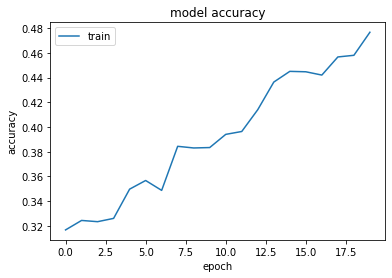

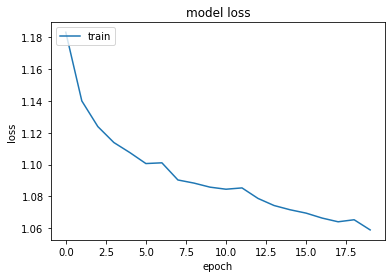

In [26]:
# Fit the model
results = model.fit(x_train_norm, y_train, epochs=20, batch_size=8)

# list all data in history
print(results.history.keys())

# summarize history for accuracy
plt.plot(results.history['accuracy'])
# plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
# plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### test set 불러오기
다양한 모양의 사진, 64x64

In [27]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/original_data/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [28]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/original_data/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [29]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/original_data/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


#### test set의 가위, 바위, 보 각각에 라벨 부여

In [30]:
import numpy as np

def load_data_fixed(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/original_data"
(x_test, y_test)=load_data_fixed(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 64, 64, 3)
y_test shape: (300,)


#### test set로 성능 확인

In [31]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.0679 - accuracy: 0.6200
test_loss: 1.0678595304489136
test_accuracy: 0.6200000047683716


#### 예측에 실패한 데이터 확인

In [32]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0.35420856 0.31926385 0.32652757]
라벨: 1, 예측결과: 0


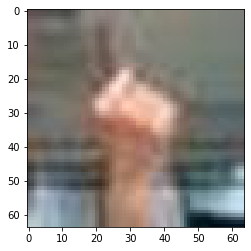

예측확률분포: [0.33238733 0.33288002 0.33473262]
라벨: 1, 예측결과: 2


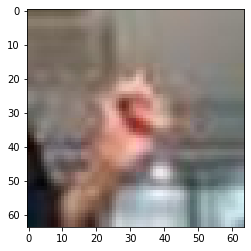

예측확률분포: [0.32173783 0.3521832  0.32607892]
라벨: 0, 예측결과: 1


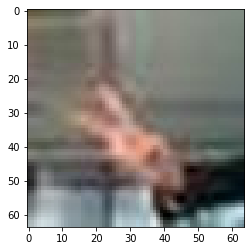

예측확률분포: [0.32119226 0.33368552 0.34512228]
라벨: 0, 예측결과: 2


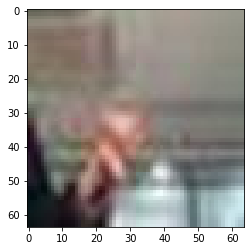

예측확률분포: [0.33619177 0.35623398 0.30757415]
라벨: 0, 예측결과: 1


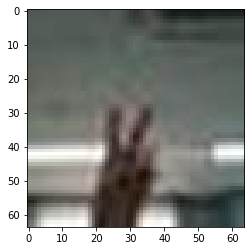

In [33]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

#### 회고

1. **프로젝트 설명**
- 가위바위보 이미지를 분류하는 딥러닝 네트워크 설계를 진행하였다. optimizer, parameter 등을 바꾸며 각 이미지를 더 잘 분류할 수 있는 방식을 찾아보았다.

2.  **시도한 것들**.
- 데이터셋을 다양하게 만들기 위해서 같은 가위라도 다양한 모양과 각도, 왼손과 오른손 등 다양하게 사진을 촬영하였다.
- Adam 보다 mini-bactch optimizer를 사용하였을 때 test accuracy가 높다는 것을 확인하고 optimizer로 SGD를 사용하고 batch_size를 지정해주었다.
- 과적합을 막기 위해 정규화를 시도하며 dropout 방식을 사용하였다. train set의 크기가 3000개, test set의 크기가 300개이므로 10% 정도를 랜덤하게 0으로 바꾸어주면서 과적합을 방지하였다.
- test accuracy를 위해서 learning rate와 epochs를 조절하였다.

3. **알게된 점**
- 가위, 바위, 보 각각을 같은 모양으로 100장씩 찍은 것을 test set으로 사용하였을 때 test accuracy가 더 좋을 것으로 예상했으나 오히려 좋지 않았다. 데이터의 다양성이 학습과 나아가 예측에도 영향을 미친다는 것을 알게 되었다.

4. **어려웠던 점.**
- 어떤 파라미터를 조절했을 때 더 좋은 결과를 만들어내는지 인과를 파악하는 것이 어려웠다. 대체적인 경향성이나 각각의 파라미터가 어떤 역할을 하는지는 파악했지만, 이들의 조합이 어떤 결과를 만들어내는지 명확하게 파악하는 것이 어려웠다.
- 아직 모호한 점은 train set의 accuracy와 test accuracy의 관계이다. 경험적으로는 train set의 accuracy가 60% 정도로 그리 높지 않을 때 test accuracy가 60% 이상이 나왔고, train set의 accuracy가 7, 80%일 때는 오히려 test accuracy가 30%로 떨어졌다. 데이터셋의 크기가 3000 정도로 충분히 크지 않아서 train set을 7, 80% accuracy로 학습시켰을 때 overfitting이 일어나는 듯 하다.

5. **자기 다짐.**
- 컬러 사진을 흑백으로 바꿨을 때 손 모양이 더 명확하게 보이고 학습이 잘 이루어질 것이라는 가설이 있었다. 그래서 흑백 사진으로 바꾸려 openCV 사용을 시도해보았으나 쉽지 않았다. openCV를 이용한 이미지 처리기법을 좀 더 공부해야겠다.